In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0) 
%matplotlib inline

In [157]:
training_data1_df = pd.read_csv("ZipDigits_traning.csv") # laod data from ZipDigits.training
                                                         # to do this step I firstly converted the file to csv file
training_data2_df = pd.read_csv("ZipDigits_test.csv")

training_data1_df.shape
training_data1_df = training_data1_df.astype(float)

training_data2_df.shape
training_data2_df = training_data2_df.astype(float)

In [165]:

#     filtered_training_data_1 = training_data1_df['1'] == 1.0  #filter data 1
#     filtered_training_data_5 = training_data1_df['1'] == 5.0 #filter data 5

#     training_data1_df_1 = training_data1_df[filtered_training_data_1]
#     training_data1_df_5 = training_data1_df[filtered_training_data_5]
#     print(training_data1_df_1)
#     print(training_data1_df_5)

#     frames = [training_data1_df_1,training_data1_df_5]
#     filtered_df = pd.concat(frames)                        #add two frames together
    

#     print(filtered_df)
def prepare(dataset):
        filtered_training_data_1 = dataset['1'] == 1.0  #filter data 1
        filtered_training_data_5 = dataset['1'] == 5.0 #filter data 5

        training_data1_df_1 = dataset[filtered_training_data_1]
        training_data1_df_5 = dataset[filtered_training_data_5]
        
        
        frames = [training_data1_df_1,training_data1_df_5]
        filtered_df = pd.concat(frames)   #add two frames together
        return filtered_df


In [167]:
filtered = prepare(training_data1_df)
filtered.index = np.arange(1, len(filtered) + 1) # reconstruct filtered data with correct index

filtered2 = prepare(training_data2_df)
filtered2.index = np.arange(1, len(filtered2) + 1)

filtered2

,1,2,3,4,5,6,7,8,9,10,...,248,249,250,251,252,253,254,255,256,257
1,1.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,-0.586,0.693,1.000,...,-1.000,-0.601,0.592,0.219,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
2,1.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,-1.000,0.561,-0.264,...,-0.874,0.374,0.729,-0.916,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3,1.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,0.219,0.787,-0.333,...,-0.932,-0.169,0.935,0.396,-0.931,-1.000,-1.000,-1.000,-1.000,-1.0
4,1.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,-0.818,0.558,0.910,...,0.333,0.333,0.333,0.385,0.948,0.333,0.324,-0.733,-1.000,-1.0
5,1.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,-1.000,-0.081,-0.081,...,-1.000,-0.372,0.559,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,5.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,-0.772,-0.090,0.227,...,0.789,1.000,1.000,0.783,0.078,-0.832,-1.000,-1.000,-1.000,-1.0
421,5.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,-1.000,-1.000,-0.993,...,-0.957,-0.452,0.135,0.553,0.621,0.418,0.418,-0.312,-0.974,-1.0
422,5.0,-1.0,-1.0,-1.0,-1.000,-1.00,-1.000,-1.000,-1.000,-1.000,...,0.132,0.418,0.633,0.541,0.418,0.259,-0.625,-0.746,-0.883,-1.0
423,5.0,-1.0,-1.0,-1.0,-1.000,-1.00,-0.565,0.388,1.000,1.000,...,-0.634,-0.126,0.383,1.000,1.000,0.970,0.207,0.045,-0.967,-1.0


In [194]:
# data = filtered.to_numpy()
# length = len(data)
# x1 = np.zeros(length) # for indensity  in the dataframe -1 is white and 1 is black
# x2 = np.zeros(length) # for symmetry
# const = 257

# for i in range(length):
#     for j in range(257):
#         if(j != 0):
#             x1[i]+= data[i][j]
            
# for i in range(length):    # for the symmetry I decide to use the horizontal symmetry, when the value                              #is approch to zero mean
#     for j in range(257):
#         if(j != 0):
#             if(j < 129):            
#                 x2[i]+= data[i][j]
#             if(j >= 129):
#                 x2[i]-= data[i][j]
# vector = np.array(list(zip(x2,x1)))
def get_dataset(data):
        numpy_data = data.to_numpy()
        length = len(numpy_data)
        x1 = np.zeros(length) # for indensity  in the dataframe -1 is white and 1 is black
        x2 = np.zeros(length) # for symmetry
        x3 = np.zeros(length)
        const = 257

        for i in range(length):
            for j in range(const):
                if(j != 0):
                    x1[i]+= numpy_data[i][j] #intensity

        for i in range(length):    # for the symmetry I decide to use the horizontal symmetry, when the value                              #is approch to zero mean
            for j in range(const):
                if(j != 0):
                    if(j%16 > 0 and j%16 <= 9):
                        if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
                            x2[i]+= numpy_data[i][j]
                    if(j%16 == 0 or j%16 > 9):
                        if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
                            x2[i]-= numpy_data[i][j]
#         for i in range(length):    # for the symmetry I decide to use the horizontal symmetry, when the value                              #is approch to zero mean
#             for j in range(const):
#                 if(j != 0):
#                     if(j < 129): 
#                         if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
#                             x3[i]+= numpy_data[i][j]
#                     if(j >=129):
#                         if(numpy_data[i][j] == -1 or numpy_data[i][j] == 1):
#                             x3[i]-= numpy_data[i][j]
#         for i in range(length):
#             x2[i] = x2[i]+x3[i]
        Data_vector = np.array(list(zip(x1,x2)))
        return Data_vector , numpy_data

[[-193.002    2.   ]
 [-197.704   -6.   ]
 [-196.93     4.   ]
 ...
 [ -67.604  -15.   ]
 [ -74.09   -19.   ]
 [-136.765  -21.   ]]


Text(0.5, 0, 'intensity')

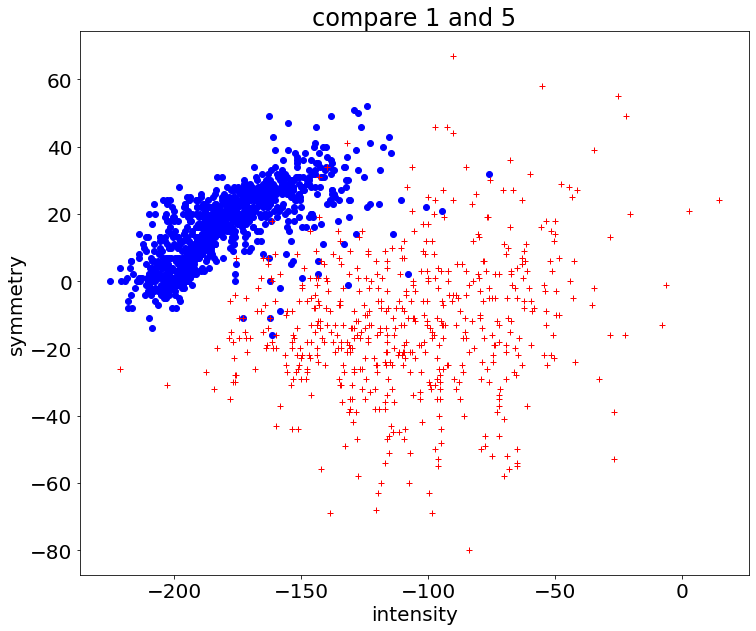

In [195]:
data_1, list_1 = get_dataset(filtered)
length = len(data_1)

print(data_1)
figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca(); #Get the current Axes instance on the current figure matching the given keyword args, or create one.
for i in range(length):
    if(list_1[i][0] == 1.0):
        plt.plot(data_1[i,0],data_1[i,1],'bo');
    else:
        plt.plot(data_1[i,0],data_1[i,1],'r+');

plt.title('compare 1 and 5')
plt.rcParams.update({'font.size': 20})
plt.ylabel('symmetry')
plt.xlabel('intensity')

Text(0.5, 0, 'symmetry')

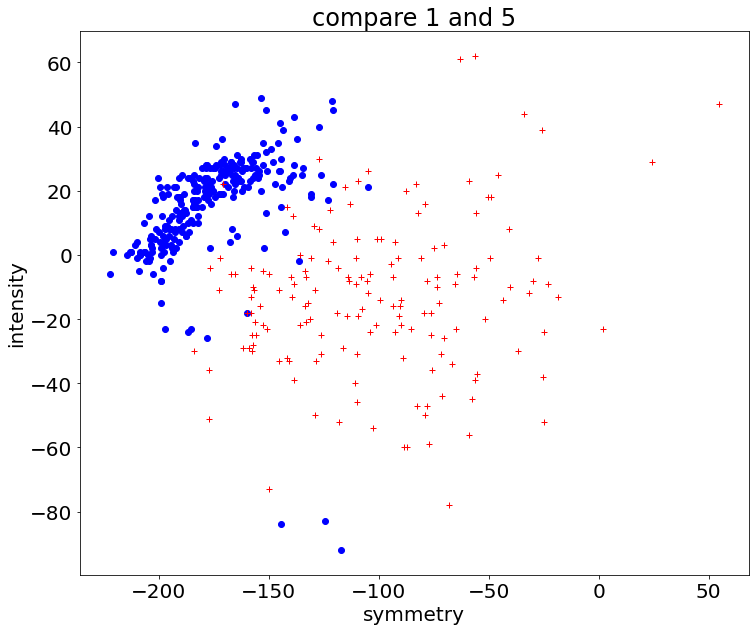

In [196]:
data_2, list_2 = get_dataset(filtered2)
length = len(data_2)

figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca(); #Get the current Axes instance on the current figure matching the given keyword args, or create one.
for i in range(length):
    if(list_2[i][0] == 1.0):
        plt.plot(data_2[i,0],data_2[i,1],'bo');
    else:
        plt.plot(data_2[i,0],data_2[i,1],'r+');

plt.title('compare 1 and 5')
plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')